<a href="https://colab.research.google.com/github/therealzh/Data_viz/blob/main/Final%20Data%20Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
from datetime import datetime
from datetime import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
path = '/content/drive/My Drive/Data viz/Final'

#**นำเข้าข้อมูลผู้ป่วย**

In [ ]:
covid_file_path = os.path.join(path,'covid19cases.csv')
print(covid_file_path)

/content/drive/My Drive/Data viz/Final/covid19cases.csv


In [ ]:
dtc = pd.read_csv(covid_file_path)
dtc.head(1)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN


In [ ]:
dtc.isnull().any()

No.                      False
announce_date            False
Notified date            False
sex                      False
age                      False
Unit                      True
nationality              False
province_of_isolation    False
risk                     False
province_of_onset        False
district_of_onset        False
dtype: bool

## **แทนค่า missing ด้วยคำว่าไม่ระบุ**

In [ ]:
dtc['Notified date'] = dtc['Notified date'].fillna('ไม่ระบุ')
dtc['sex'] = dtc['sex'].fillna('ไม่ระบุ')
dtc['age'] = dtc['age'].fillna('ไม่ระบุ')
dtc['nationality'] = dtc['nationality'].fillna('ไม่ระบุ')
dtc['province_of_isolation'] = dtc['province_of_isolation'].fillna('ไม่ระบุ')
dtc['risk'] = dtc['risk'].fillna('ไม่ระบุ')
dtc['province_of_onset'] = dtc['province_of_onset'].fillna('ไม่ระบุ')
dtc['district_of_onset'] = dtc['district_of_onset'].fillna('ไม่ระบุ')

In [ ]:
dtc.head()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,ไม่ระบุ,หญิง,61,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ
1,2,17/1/2020,ไม่ระบุ,หญิง,74,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ
2,3,22/1/2020,ไม่ระบุ,หญิง,73,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,ไม่ระบุ,ชาย,68,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ
4,5,24/1/2020,ไม่ระบุ,หญิง,66,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ


In [ ]:
dtc['announce_date']  = pd.to_datetime(dtc['announce_date'],format='%d/%m/%Y')
dtc.head()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,2020-01-12,ไม่ระบุ,หญิง,61,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ
1,2,2020-01-17,ไม่ระบุ,หญิง,74,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ
2,3,2020-01-22,ไม่ระบุ,หญิง,73,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,2020-01-22,ไม่ระบุ,ชาย,68,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ
4,5,2020-01-24,ไม่ระบุ,หญิง,66,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ


##จัดกลุ่มเดือน

In [ ]:
covid1 = dtc.groupby('announce_date')['No.'].count()
covid_M = pd.DataFrame(covid1).reset_index()
covid_M['Month'] = covid_M['announce_date'].dt.month

In [ ]:
covid_M.groupby('Month')['No.'].sum()

Month
1     11917
2      7192
3      4521
4     29950
5       127
6        90
7       139
8       102
9       152
10      216
11      218
12     2886
Name: No., dtype: int64

#นำเข้าข้อมูลการเดินทาง 63-64

In [ ]:
dtp = pd.read_excel('/content/passenger-covid19.xlsx',sheet_name='2563-2564 รวมในประเทศ',skiprows=1,skipfooter=33)
dtp..head(1)

,Unnamed: 0,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,...,2021-03-18 00:00:00,2021-03-19 00:00:00,2021-03-20 00:00:00,2021-03-21 00:00:00,2021-03-22 00:00:00,2021-03-23 00:00:00,2021-03-24 00:00:00,2021-03-25 00:00:00,2021-03-26 00:00:00,2021-03-27 00:00:00,2021-03-28 00:00:00,2021-03-29 00:00:00,2021-03-30 00:00:00,2021-03-31 00:00:00,2021-04-01 00:00:00,2021-04-02 00:00:00,2021-04-03 00:00:00,2021-04-04 00:00:00,2021-04-05 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-04-08 00:00:00,2021-04-09 00:00:00,2021-04-10 00:00:00,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00,2021-04-21 00:00:00,2021-04-22 00:00:00,2021-04-23 00:00:00,2021-04-24 00:00:00,2021-04-25 00:00:00,2021-04-26 00:00:00
0,ทางถนน (คน),1483255,1705026,1752572,1576146,1565134,1746239,1730243,1721777,1698594,1727356,1522765,1511236,1683606,1691301,1727613,1676901,1732040,1556750,1511356,1718946,1710079,1678182,1685422,1658692,1523835,1498975,1696898,1679988,1668462,1640721,1704546,1400174,1483074,1706497,1731697,1727513,1662866,1746742,1505635,...,997062,1017447,849673,787616,937505,969454,958065,981683,1011976,877911,794001,974571,965117,967022,987469,1006485,868194,789312,965421,753176,908431,936938,929038,719618,555680,578184,424539,454352,479063,596596,540688,507339,695769,665925,648848,631892,635830,516751,425707,580580


In [ ]:
dtp.drop([0,1,2,3],inplace=True)
dtp

,Unnamed: 0,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,...,2021-03-18 00:00:00,2021-03-19 00:00:00,2021-03-20 00:00:00,2021-03-21 00:00:00,2021-03-22 00:00:00,2021-03-23 00:00:00,2021-03-24 00:00:00,2021-03-25 00:00:00,2021-03-26 00:00:00,2021-03-27 00:00:00,2021-03-28 00:00:00,2021-03-29 00:00:00,2021-03-30 00:00:00,2021-03-31 00:00:00,2021-04-01 00:00:00,2021-04-02 00:00:00,2021-04-03 00:00:00,2021-04-04 00:00:00,2021-04-05 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-04-08 00:00:00,2021-04-09 00:00:00,2021-04-10 00:00:00,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00,2021-04-21 00:00:00,2021-04-22 00:00:00,2021-04-23 00:00:00,2021-04-24 00:00:00,2021-04-25 00:00:00,2021-04-26 00:00:00
4,รวมประชาชนเดินทาง (คน),2743864,3370836,3520819,2975450,2835519,3606451,3601007,3568342,3586381,3739415,3052605,2845067,3538827,3557271,3583076,3540578,3719430,3080385,2828993,3613007,3586260,3534816,3553612,3571009,2999481,2787267,3489920,3506480,3458172,3458709,3663798,2809229,2744876,3511747,3514595,3541737,3479387,3704945,2870882,...,2118941,2241939,1680066,1483317,2048598,2116190,2084419,2136748,2252695,1756657,1530169,2150744,2126157,2155874,2180370,2274954,1786223,1513789,2125466,1500660,2032142,1952409,1916257,1382877,1088806,1194468,890406,897609,925295,1171059,991380,886623,1323452,1249329,1208025,1175707,1180619,869281,708446,1066591


In [ ]:
travel = dtp.iloc[:,:].sum()
travel

Unnamed: 0             รวมประชาชนเดินทาง (คน)
2020-01-01 00:00:00                   2743864
2020-01-02 00:00:00                   3370836
2020-01-03 00:00:00                   3520819
2020-01-04 00:00:00                   2975450
                                ...          
2021-04-22 00:00:00                   1175707
2021-04-23 00:00:00                   1180619
2021-04-24 00:00:00                    869281
2021-04-25 00:00:00                    708446
2021-04-26 00:00:00                   1066591
Length: 483, dtype: object

In [ ]:
travel_n = pd.DataFrame(travel).reset_index()
travel_n.head()

,index,0
0,Unnamed: 0,รวมประชาชนเดินทาง (คน)
1,2020-01-01 00:00:00,2743864
2,2020-01-02 00:00:00,3370836
3,2020-01-03 00:00:00,3520819
4,2020-01-04 00:00:00,2975450


In [ ]:
travel_n.drop(index=0,inplace=True)

In [ ]:
travel_n.rename(columns={'index':'announce_date',0:'Total'},inplace=True)

In [ ]:
travel_n['announce_date'] = pd.to_datetime(travel_n['announce_date'],format='%d/%m/%Y')
travel_n

,announce_date,Num_travel
1,2020-01-01,2743864
2,2020-01-02,3370836
3,2020-01-03,3520819
4,2020-01-04,2975450
5,2020-01-05,2835519
...,...,...
478,2021-04-22,1175707
479,2021-04-23,1180619
480,2021-04-24,869281
481,2021-04-25,708446


In [ ]:
covid_M = pd.DataFrame(covid1).reset_index()
covid_M.rename(columns={'index':'announce_date','No.':'count_p'},inplace=True)
covid_M

,announce_date,count_p
0,2020-01-12,1
1,2020-01-17,1
2,2020-01-22,2
3,2020-01-24,1
4,2020-01-25,1
...,...,...
410,2021-04-22,1470
411,2021-04-23,2070
412,2021-04-24,2839
413,2021-04-25,2438


In [ ]:
covid_M['month'] = covid_M['announce_date'].dt.month
covid_M

,announce_date,count_p,month
0,2020-01-12,1,1
1,2020-01-17,1,1
2,2020-01-22,2,1
3,2020-01-24,1,1
4,2020-01-25,1,1
...,...,...,...
410,2021-04-22,1470,4
411,2021-04-23,2070,4
412,2021-04-24,2839,4
413,2021-04-25,2438,4


In [ ]:
cm = covid_M[covid_M['announce_date'] <= datetime(year=2020,month=12,day=31)]
cm

,announce_date,count_p,month
0,2020-01-12,1,1
1,2020-01-17,1,1
2,2020-01-22,2,1
3,2020-01-24,1,1
4,2020-01-25,1,1
...,...,...,...
294,2020-12-27,121,12
295,2020-12-28,144,12
296,2020-12-29,155,12
297,2020-12-30,250,12


In [ ]:
cm.groupby('month')['count_p'].sum()

month
1       19
2       23
3     1609
4     1303
5      127
6       90
7      139
8      102
9      152
10     216
11     218
12    2886
Name: count_p, dtype: int64

#รวมตาราง

In [ ]:
travel_n['Num_Travel'] = travel_n['announce_date'].map(covid_M.set_index('announce_date')['count_p'])
travel_n['month'] = travel_n['announce_date'].dt.month
travel_n

,announce_date,Num_travel,Num_Travel,month
1,2020-01-01,2743864,NaN,1
2,2020-01-02,3370836,NaN,1
3,2020-01-03,3520819,NaN,1
4,2020-01-04,2975450,NaN,1
5,2020-01-05,2835519,NaN,1
...,...,...,...,...
478,2021-04-22,1175707,1470.0,4
479,2021-04-23,1180619,2070.0,4
480,2021-04-24,869281,2839.0,4
481,2021-04-25,708446,2438.0,4


In [ ]:
cv20 = travel_n[travel_n['announce_date'] <= datetime(year=2020,month=12,day=31)]
cv20.groupby('month')['Num_Travel'].sum()

month
1       19.0
2       23.0
3     1609.0
4     1303.0
5      127.0
6       90.0
7      139.0
8      102.0
9      152.0
10     216.0
11     218.0
12    2886.0
Name: Num_Travel, dtype: float64

In [ ]:
almost1 = pd.DataFrame(cv20.groupby('month')['Num_travel'].sum()).reset_index()

In [ ]:
almost2 = pd.DataFrame(cv20.groupby('month')['Num_Travel'].sum()).reset_index()

In [ ]:
almost1['Num_Travel'] = almost1['month'].map(almost2.set_index('month')['Num_Travel'])

In [ ]:
almost3 = almost1

In [ ]:
almost3['Num_travel'] = almost1['Num_travel']/10000

In [ ]:
almost3

,month,Num_travel,Num_Travel
0,1,0.000105,19.0
1,2,0.000093,23.0
2,3,0.000062,1609.0
3,4,0.000023,1303.0
4,5,0.000033,127.0
5,6,0.000048,90.0
6,7,0.000062,139.0
7,8,0.000067,102.0
8,9,0.000068,152.0
9,10,0.000068,216.0


#กราฟข้อที่  1

In [ ]:
width = 0.35

In [ ]:
x = np.arange(len(almost1['month'])) 

<BarContainer object of 12 artists>

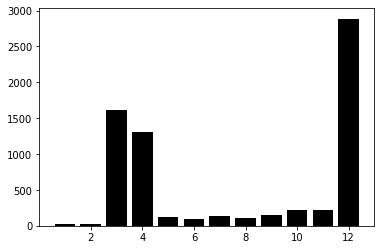

In [ ]:
plt.bar(almost3['month'],almost3['Num_travel'],label = 'Num_travel',color = 'red',)
plt.bar(almost3['month'],almost3['Num_Travel'],label = 'Num_Travel',color = 'black',bottom=almost3['Num_travel'])

In [ ]:
travel_n.to_csv('คนเดินทาง.csv',index=False)

In [ ]:
dtc.to_csv('คนป่วย.csv',index=False)

In [ ]:
dtp.to_csv('move.csv',index=False)